In [3]:
# pip install pandas
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency
from sklearn.preprocessing import LabelEncoder

In [4]:
df_train = pd.read_csv('src/UNSW_NB15_testing-set.csv', sep=',')
df_test  = pd.read_csv('src/UNSW_NB15_training-set.csv', sep=',')

df = pd.concat([df_train, df_test], ignore_index=True)

In [3]:
df

,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,1,0.000011,udp,-,INT,2,0,496,0,90909.090200,...,1,2,0,0,0,1,2,0,Normal,0
1,2,0.000008,udp,-,INT,2,0,1762,0,125000.000300,...,1,2,0,0,0,1,2,0,Normal,0
2,3,0.000005,udp,-,INT,2,0,1068,0,200000.005100,...,1,3,0,0,0,1,3,0,Normal,0
3,4,0.000006,udp,-,INT,2,0,900,0,166666.660800,...,1,3,0,0,0,2,3,0,Normal,0
4,5,0.000010,udp,-,INT,2,0,2126,0,100000.002500,...,1,3,0,0,0,2,3,0,Normal,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
257668,175337,0.000009,udp,dns,INT,2,0,114,0,111111.107200,...,13,24,0,0,0,24,24,0,Generic,1
257669,175338,0.505762,tcp,-,FIN,10,8,620,354,33.612649,...,1,2,0,0,0,1,1,0,Shellcode,1
257670,175339,0.000009,udp,dns,INT,2,0,114,0,111111.107200,...,3,13,0,0,0,3,12,0,Generic,1
257671,175340,0.000009,udp,dns,INT,2,0,114,0,111111.107200,...,14,30,0,0,0,30,30,0,Generic,1


Type (T.) N: nominal, I: integer, F: float, T: timestamp and B: binary


id                     int64
dur                 [Float]     [Continuous]
proto               [Nominal]   [Categorical]
service             [Nominal]   [Categorical]
state               [Nominal]   [Categorical]
spkts               [Integer]   [Continuous]
dpkts               [Integer]   [Continuous]
sbytes              [Integer]   [Continuous]
dbytes              [Integer]   [Continuous]
rate                 float64    [Continuous]
sttl                [Integer]   [Continuous]
dttl                [Integer]   [Continuous]
sload               [Float]     [Continuous]
dload               [Float]     [Continuous]
sloss               [Integer]   [Continuous]
dloss               [Integer]   [Continuous]
sinpkt              [Float]     [Continuous]
dinpkt              [Float]     [Continuous]
sjit                [Float]     [Continuous]
djit                [Float]     [Continuous]
swin                [Integer]   [Continuous]
stcpb               [Integer]   [Continuous]
dtcpb               [Integer]   [Continuous]
dwin                [Integer]   [Continuous]
tcprtt              [Float]     [Continuous]
synack              [Float]     [Continuous]
ackdat              [Float]     [Continuous]
smean               [Integer]   [Continuous]
dmean               [Integer]   [Continuous]
trans_depth         [Integer]   [Continuous]
response_body_len   [Integer]   [Continuous]
ct_srv_src          [Integer]   [Continuous]
ct_state_ttl        [Integer]   [Continuous]
ct_dst_ltm          [Integer]   [Continuous]
ct_src_dport_ltm    [Integer]   [Continuous]
ct_dst_sport_ltm    [Integer]   [Continuous]
ct_dst_src_ltm      [Integer]   [Continuous]
is_ftp_login        [Binary]    [Categorical]
ct_ftp_cmd          [Integer]   [Continuous]
ct_flw_http_mthd    [Integer]   [Continuous]
ct_src_ltm          [Integer]   [Continuous]
ct_srv_dst          [Integer]   [Continuous]
is_sm_ips_ports     [Binary]    [Categorical]
attack_cat          [Nominal]   [Categorical]
label               [Binary]    [Categorical]

+---------------------------+---------------------+------------------------------+
| ↓ Features / Prediction → | Continuous          | Categorical                  |
+---------------------------+---------------------+------------------------------+
| Continuous                | Pearson Correlation | Linear Discriminant Analysis |
+---------------------------+---------------------+------------------------------+
| Categorical               | Anova               | Chi - Square                 |
+---------------------------+---------------------+------------------------------+


id                     int64
rate                 float64
0:2

Flow features
--> srcip   
--> sport
--> dstip
--> dsport
proto               [Nominal]
1:4

Basic features
state               [Nominal]
dur                 [Float]
sbytes              [Integer]
dbytes              [Integer]
sttl                [Integer]
dttl                [Integer]
sloss               [Integer]
dloss               [Integer]
service             [Nominal]
sload               [Float]
dload               [Float]
spkts               [Integer]
dpkts               [Integer]
13:0

Content features
swin                [Integer]
dwin                [Integer]
stcpb               [Integer]
dtcpb               [Integer]
smean               [Integer]
dmean               [Integer]
trans_depth         [Integer]
response_body_len   [Integer]
8:0

Time features
sjit                [Float]
djit                [Float]
--> stime
--> ltime
sinpkt               float64
dinpkt               float64
tcprtt               float64
synack               float64
ackdat               float64
7:2

Additional

General purpose features
is_sm_ips_ports        int64
ct_state_ttl           int64
ct_flw_http_mthd       int64
is_ftp_login           int64
ct_ftp_cmd             int64
5:0

Connection features
ct_srv_src             int64
ct_srv_dst             int64
ct_dst_ltm             int64
ct_src_ltm             int64
ct_src_dport_ltm       int64
ct_dst_sport_ltm       int64
ct_dst_src_ltm         int64
7:0


labelled features
attack_cat            object
label                  int64
2:0

In [4]:
df.dtypes

id                     int64
dur                  float64
proto                 object
service               object
state                 object
spkts                  int64
dpkts                  int64
sbytes                 int64
dbytes                 int64
rate                 float64
sttl                   int64
dttl                   int64
sload                float64
dload                float64
sloss                  int64
dloss                  int64
sinpkt               float64
dinpkt               float64
sjit                 float64
djit                 float64
swin                   int64
stcpb                  int64
dtcpb                  int64
dwin                   int64
tcprtt               float64
synack               float64
ackdat               float64
smean                  int64
dmean                  int64
trans_depth            int64
response_body_len      int64
ct_srv_src             int64
ct_state_ttl           int64
ct_dst_ltm             int64
ct_src_dport_l

In [5]:
df.shape

(257673, 45)

In [8]:
# df_target = df['attack_cat']
# Lista de variables categóricas
list_cat_features = ['proto','service','state','is_ftp_login','is_sm_ips_ports'] # las variables is_ftp_login y is_sm_ips_ports son binarias
for item in list_cat_features :
    print(f'--> Tabla de contingencia de {item} \n')
    df_cross = pd.crosstab(df[item], df['attack_cat'])
    chi2_stat, p_value, dof, expected = chi2_contingency(df_cross)
    n = [df_cross.sum().sum()]
    k = df_cross.shape[0]
    r = df_cross.shape[1]
    crammers_v = np.sqrt(chi2_stat / (n * min(k - 1, r - 1)))
    print(df_cross)
    print(f'Chi-Cuadrado: {chi2_stat}')
    print(f'p-valor: {p_value}')
    print(f'Grados de libertad: {dof}')
    print(f'Coeficiente de Crammers V: {crammers_v}')
    print(f'Frecuencias esperadas: \n {expected}')
    print('\n')

--> Tabla de contingencia de proto 

attack_cat  Analysis  Backdoor  DoS  Exploits  Fuzzers  Generic  Normal  \
proto                                                                     
3pc                8         7   44        55       10        1       0   
a/n                8         7   44        55       10        1       0   
aes-sp3-d          8         7   44        55       10        1       0   
any               24        21  132       165       30        3       0   
argus              8         7   44        55       10        0       0   
...              ...       ...  ...       ...      ...      ...     ...   
wsn                8         7   44        55       10        1       0   
xnet               8         7   44        55       10        1       0   
xns-idp            8         7   44        55       10        2       0   
xtp                8         7   44        55       10        1       0   
zero               8         7   44        55       10        1

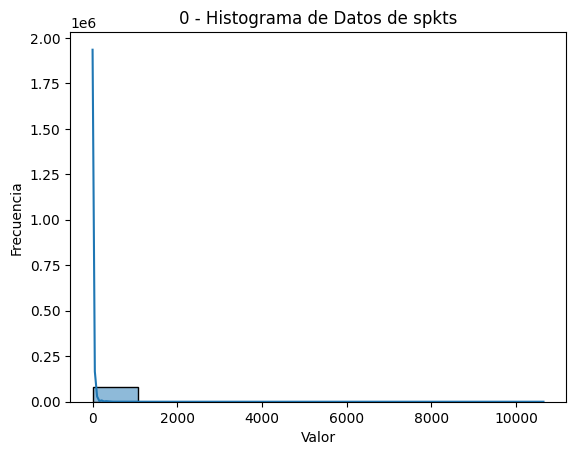

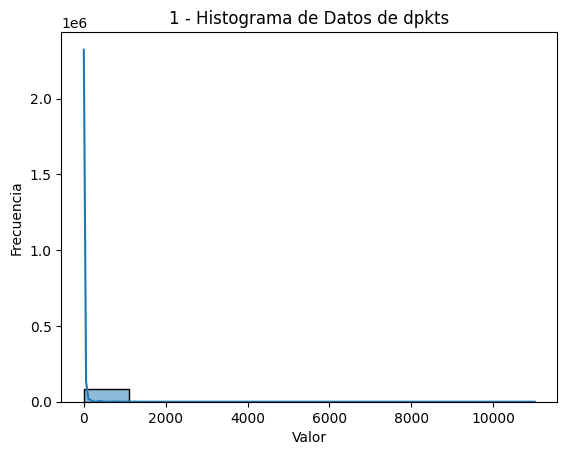

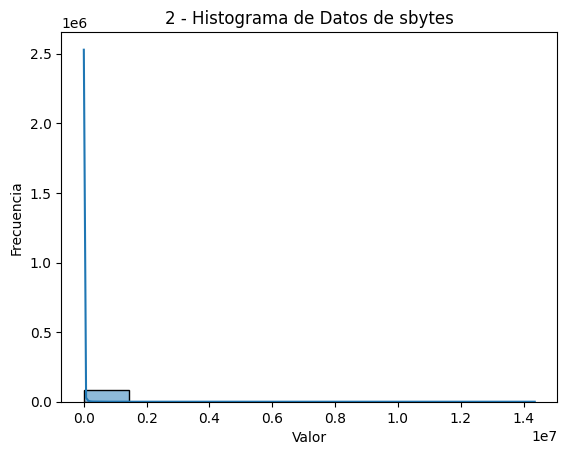

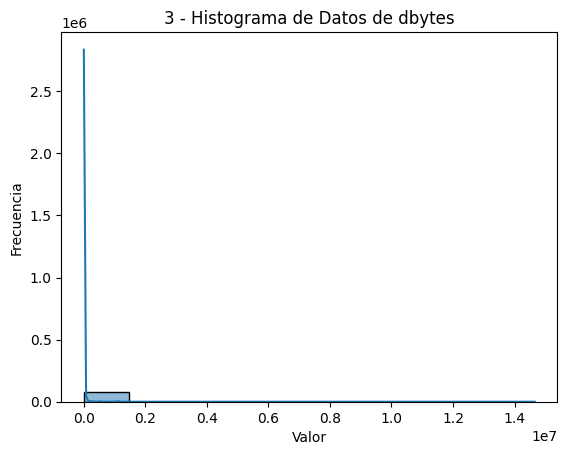

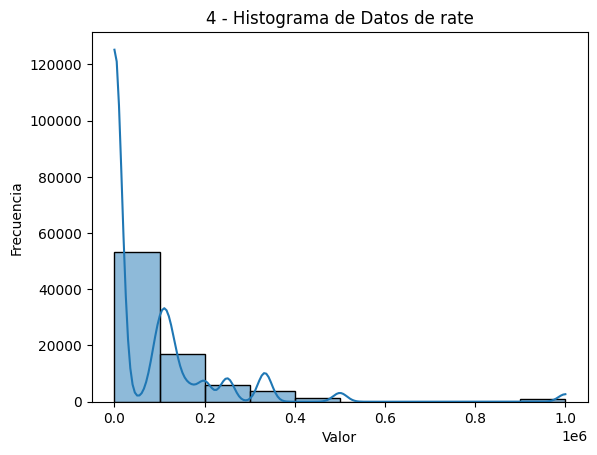

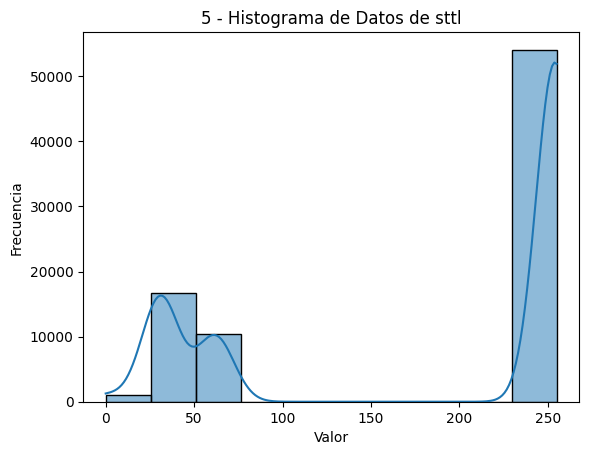

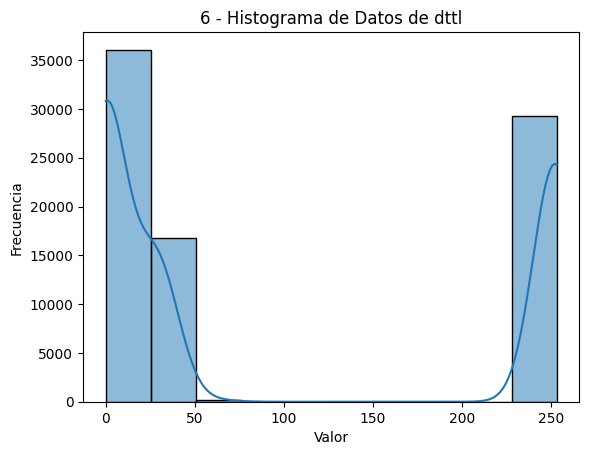

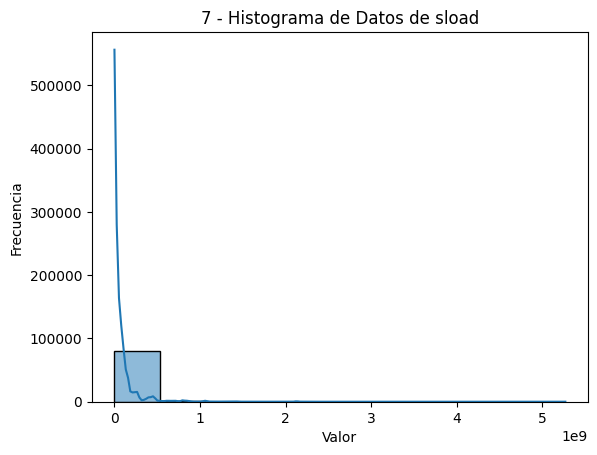

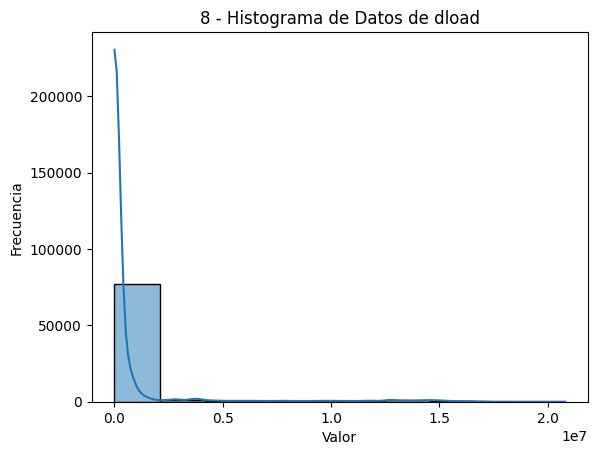

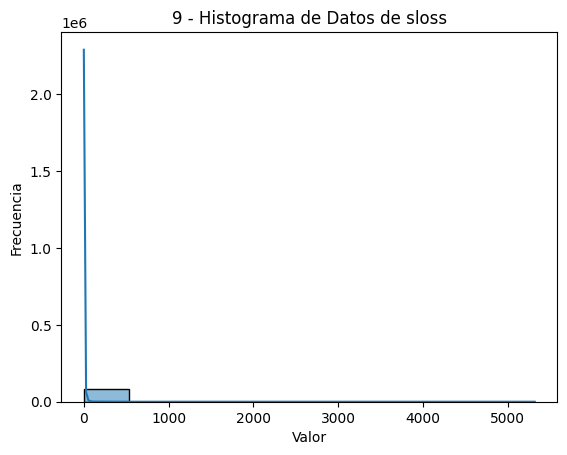

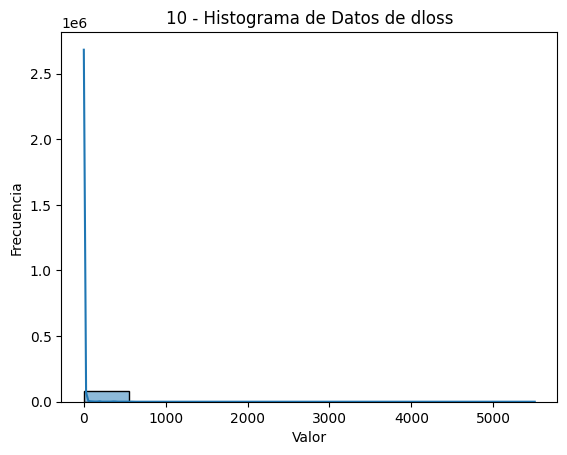

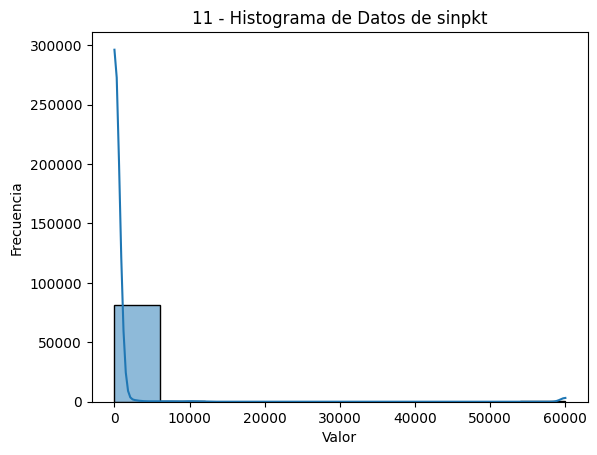

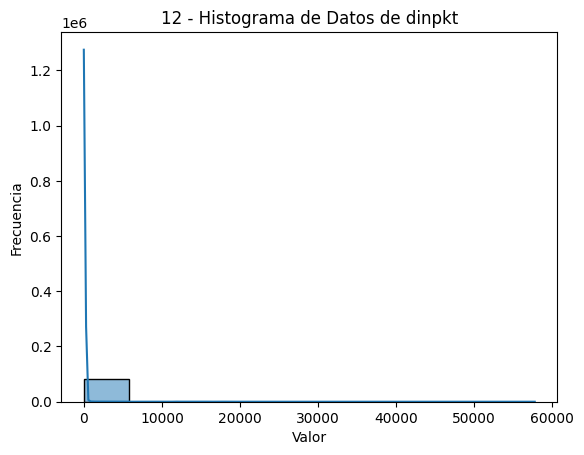

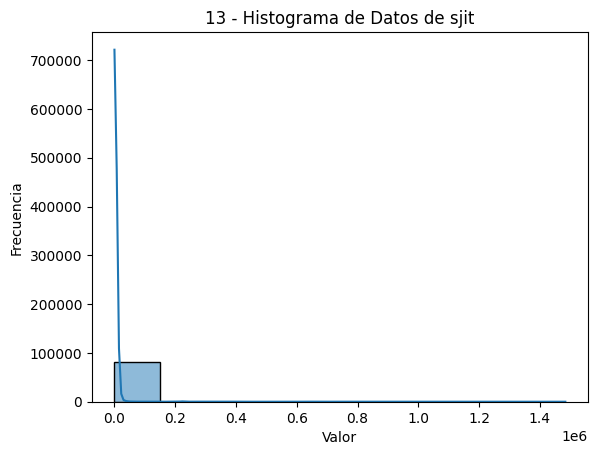

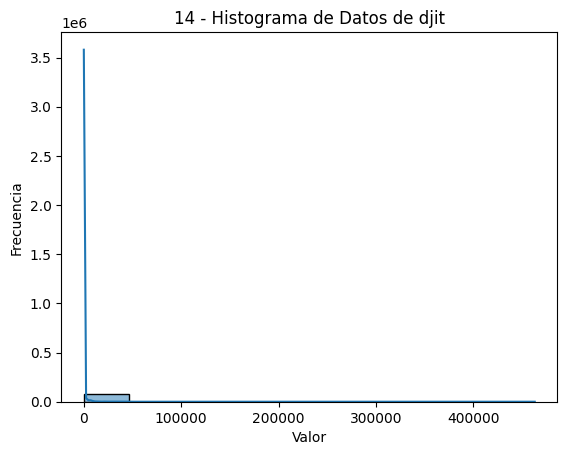

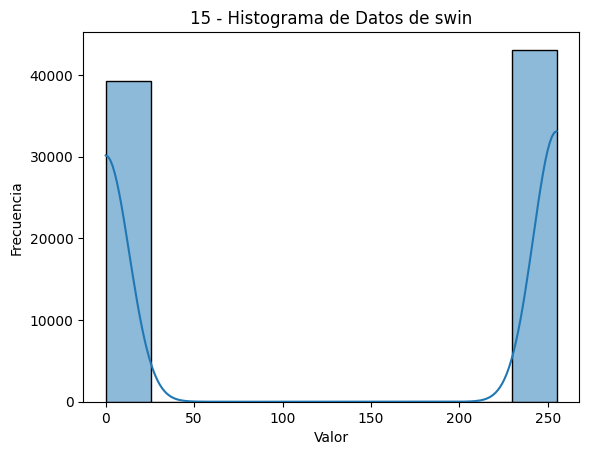

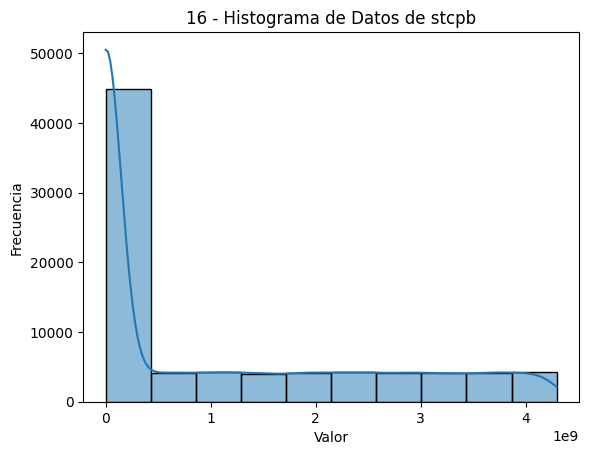

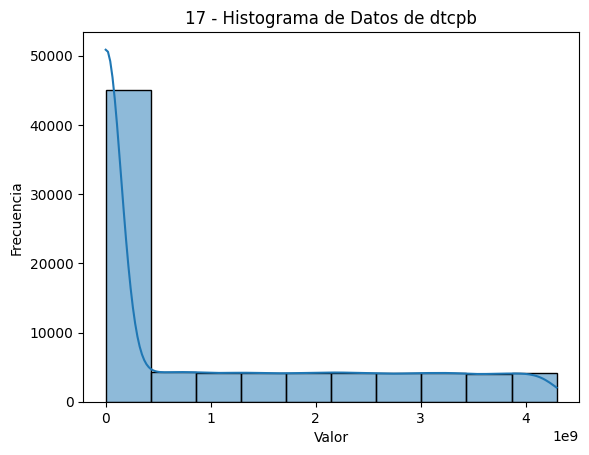

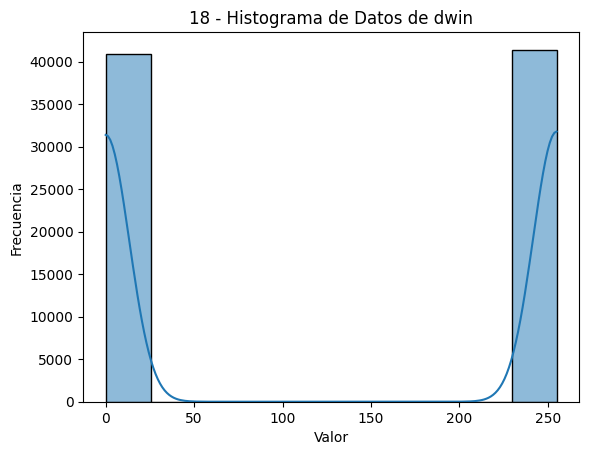

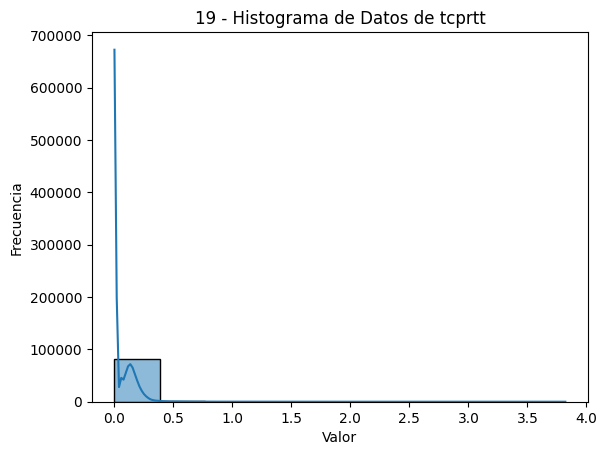

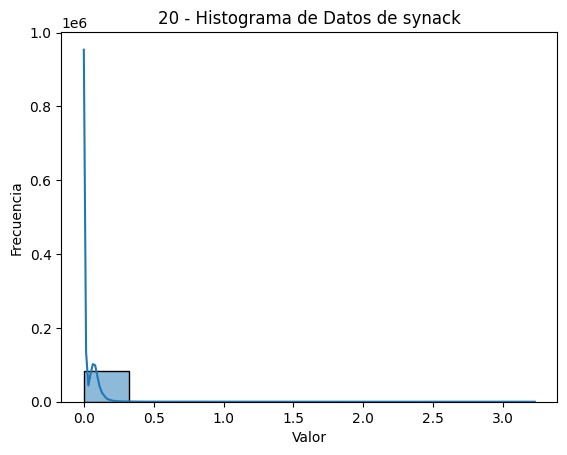

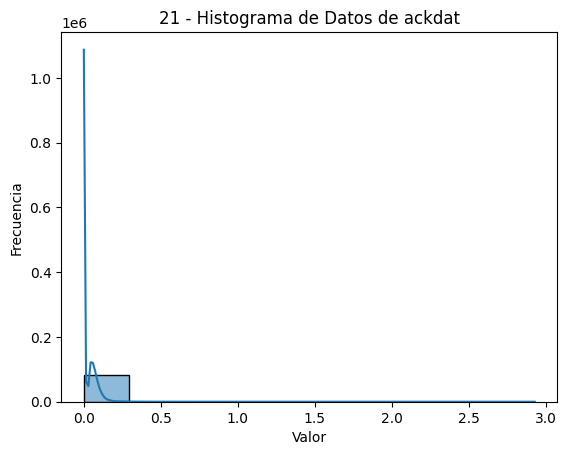

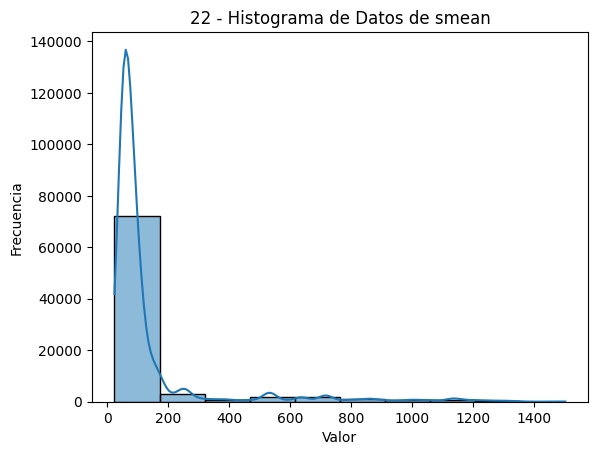

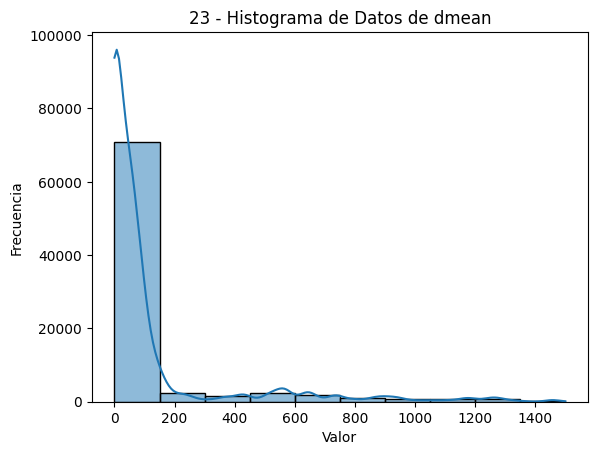

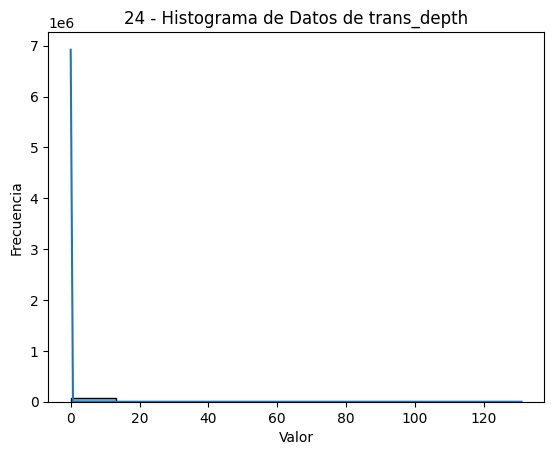

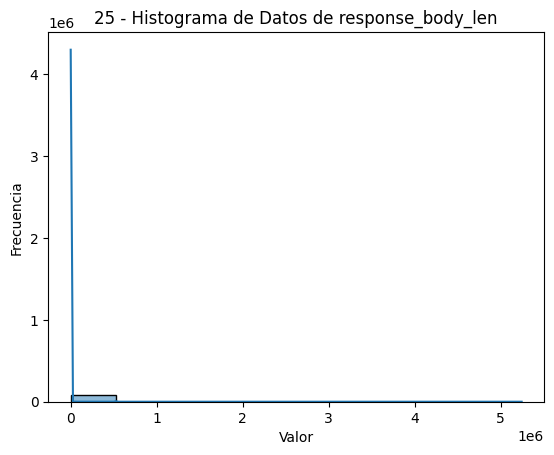

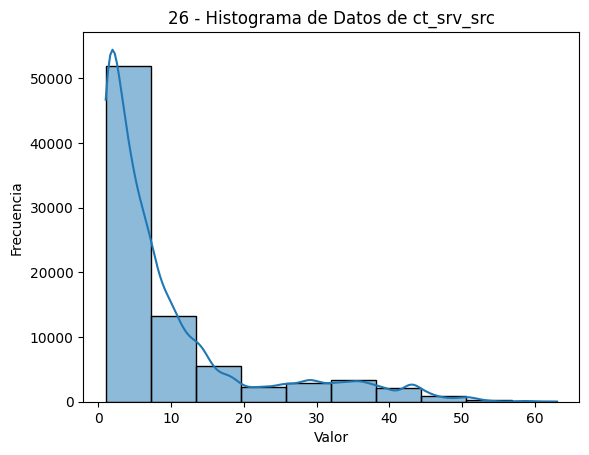

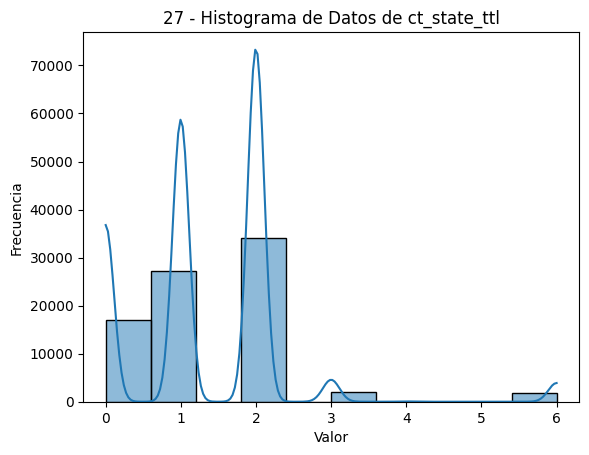

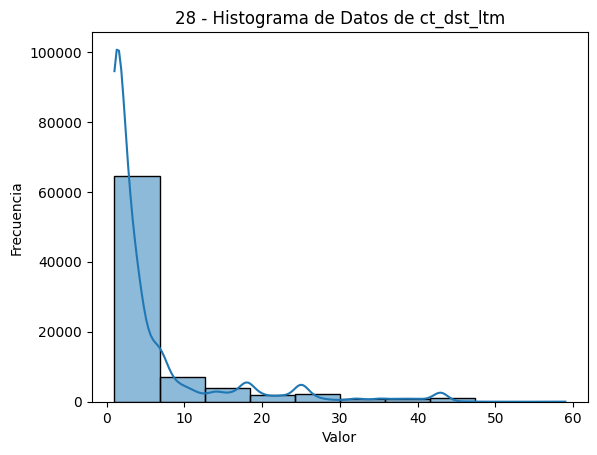

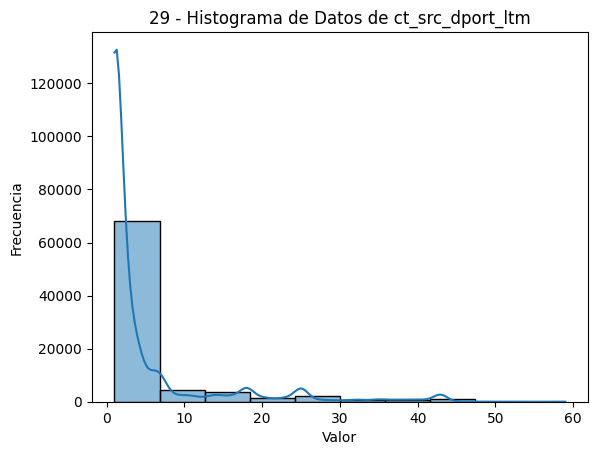

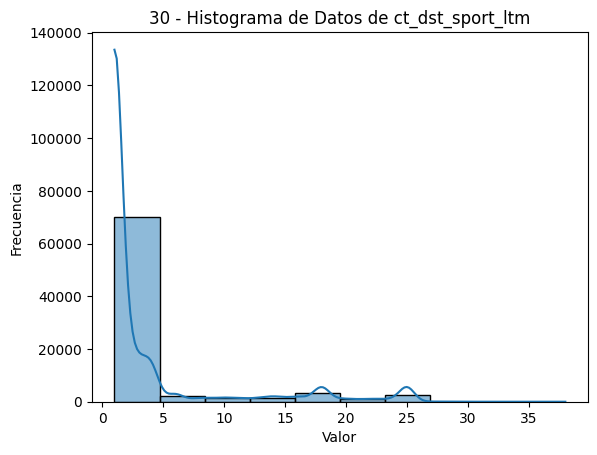

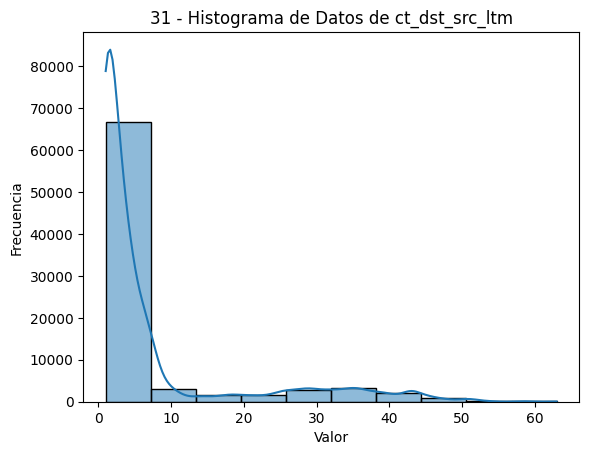

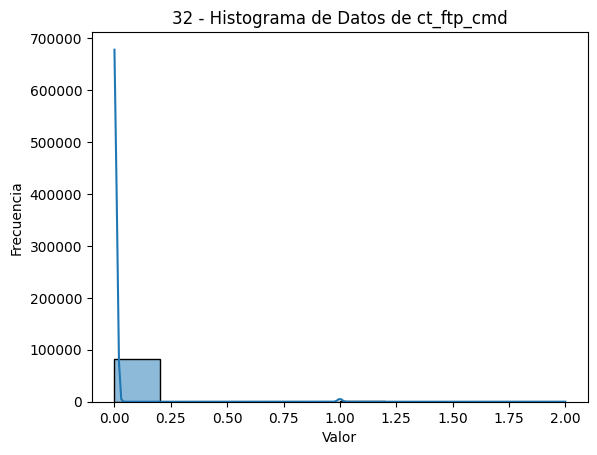

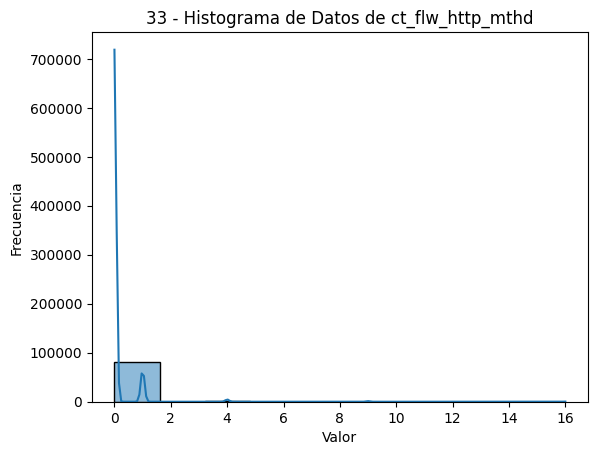

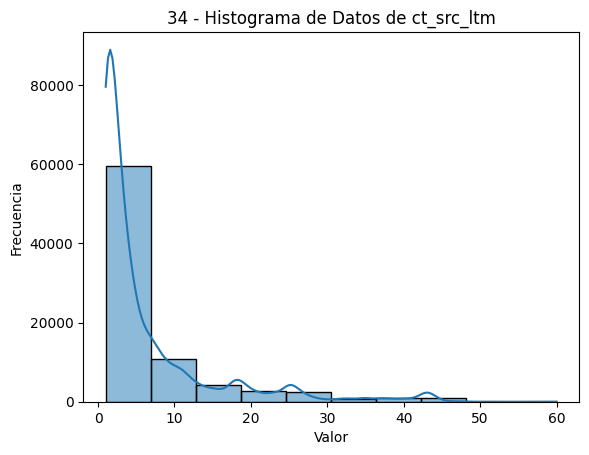

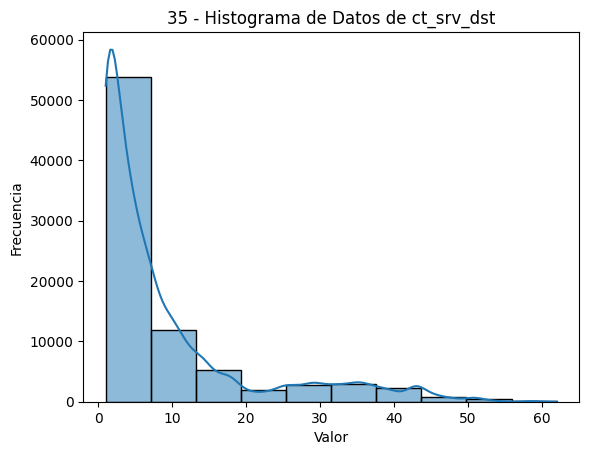

In [33]:
# lista de variables continuas
list_con_features = ['spkts','dpkts','sbytes','dbytes','rate','sttl','dttl','sload','dload','sloss','dloss','sinpkt','dinpkt','sjit','djit','swin','stcpb','dtcpb','dwin','tcprtt','synack','ackdat','smean','dmean','trans_depth','response_body_len','ct_srv_src','ct_state_ttl','ct_dst_ltm','ct_src_dport_ltm','ct_dst_sport_ltm','ct_dst_src_ltm','ct_ftp_cmd','ct_flw_http_mthd','ct_src_ltm','ct_srv_dst']

cont = 0

for item in list_con_features :
    sns.histplot(df_train[item], bins=10, kde=True)  # kde=True añade una estimación de densidad
    plt.title(f'{cont} - Histograma de Datos de {item}')
    plt.xlabel('Valor')
    plt.ylabel('Frecuencia')
    plt.show()
    cont = cont + 1

In [70]:
# Codificación de variables

# Lista de datos categóricos que necesitan ser convertidos a numéricos para evaluar la correlación
features_for_encoder = ['proto','service','state','attack_cat']
features_for_encoder_m = ['proto_m','service_m','state_m','attack_cat_m']
label_encoder = LabelEncoder()

for i in range(len(features_for_encoder)) :
    df[features_for_encoder_m[i]] = label_encoder.fit_transform(df[features_for_encoder[i]])
    print(df.groupby(features_for_encoder[i])[features_for_encoder_m[i]].mean())



proto
3pc            0.0
a/n            1.0
aes-sp3-d      2.0
any            3.0
argus          4.0
             ...  
wsn          128.0
xnet         129.0
xns-idp      130.0
xtp          131.0
zero         132.0
Name: proto_m, Length: 133, dtype: float64
service
-            0.0
dhcp         1.0
dns          2.0
ftp          3.0
ftp-data     4.0
http         5.0
irc          6.0
pop3         7.0
radius       8.0
smtp         9.0
snmp        10.0
ssh         11.0
ssl         12.0
Name: service_m, dtype: float64
state
ACC     0.0
CLO     1.0
CON     2.0
ECO     3.0
FIN     4.0
INT     5.0
PAR     6.0
REQ     7.0
RST     8.0
URN     9.0
no     10.0
Name: state_m, dtype: float64
attack_cat
Analysis          0.0
Backdoor          1.0
DoS               2.0
Exploits          3.0
Fuzzers           4.0
Generic           5.0
Normal            6.0
Reconnaissance    7.0
Shellcode         8.0
Worms             9.0
Name: attack_cat_m, dtype: float64


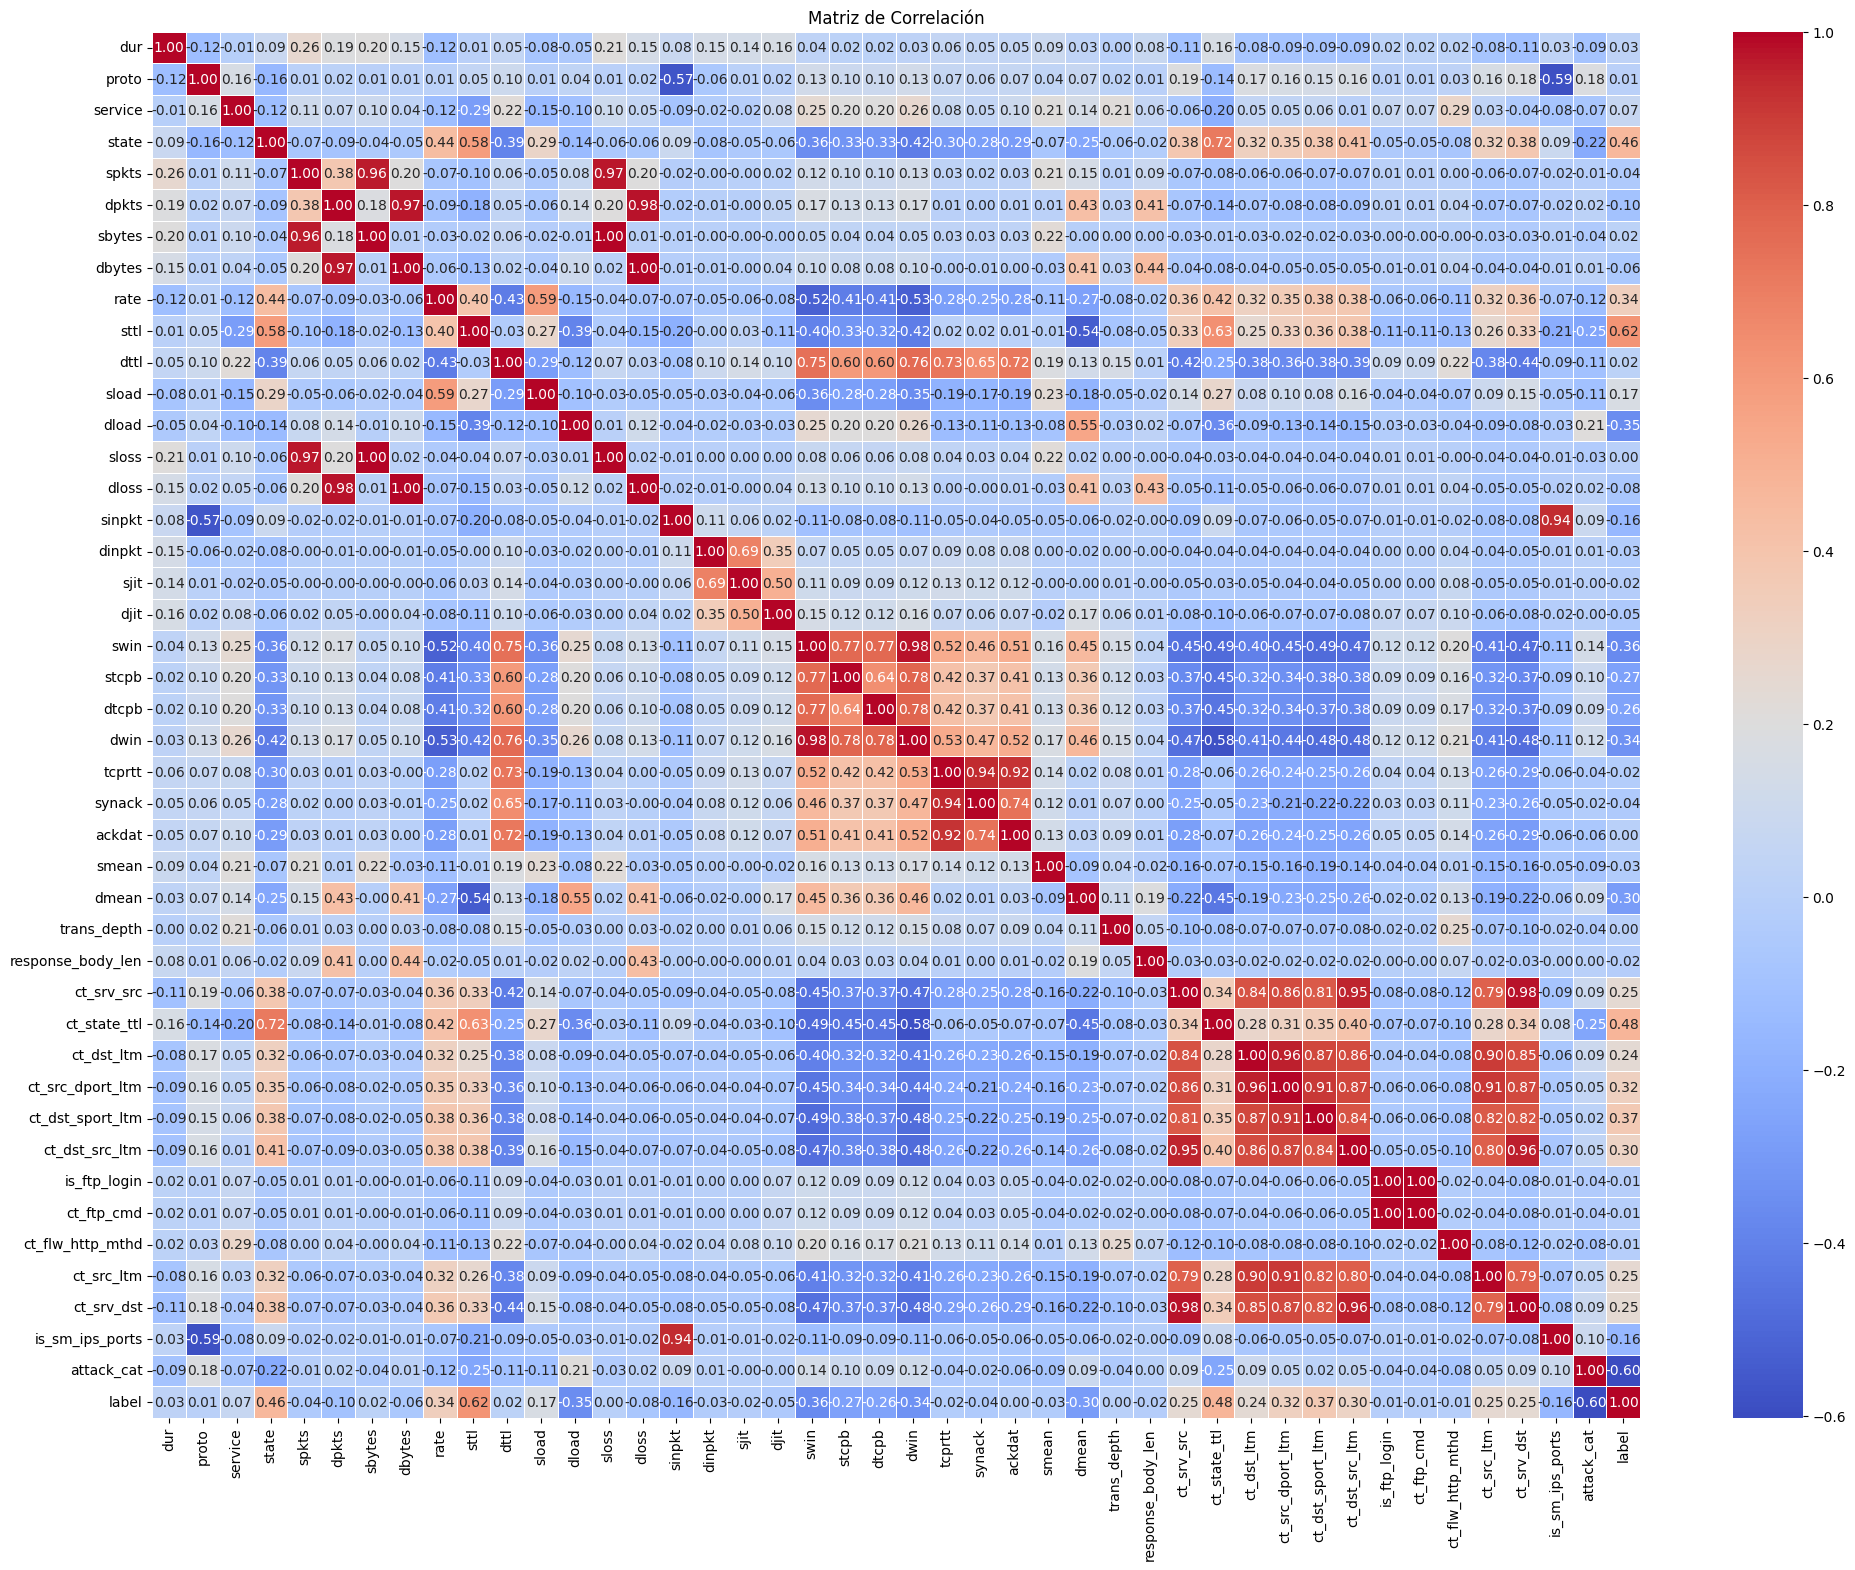

In [29]:
df_for_matrix = df.drop(columns=['id'])
corr_matrix = df_for_matrix.corr()

plt.figure(figsize=(24, 18))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Matriz de Correlación')
plt.show()

In [11]:
print(df['swin'].unique().sort())

None


In [12]:
print(df['dwin'].unique().sort())

None
